In [1]:
import turicreate as tc
img_folder = 'image'
data = tc.image_analysis.load_images(img_folder, with_path=True)



Columns:
	path	str
	image	Image

Rows: 199

Data:
+-------------------------------+-------------------------+
|              path             |          image          |
+-------------------------------+-------------------------+
|  image/doraemon/image-001.jpg |  Height: 165 Width: 310 |
|  image/doraemon/image-002.jpg | Height: 1377 Width: 736 |
|  image/doraemon/image-003.png |  Height: 382 Width: 215 |
|  image/doraemon/image-004.png |  Height: 248 Width: 203 |
|  image/doraemon/image-005.jpg |  Height: 637 Width: 430 |
| image/doraemon/image-006.jpeg |  Height: 275 Width: 183 |
|  image/doraemon/image-007.jpg |  Height: 230 Width: 210 |
| image/doraemon/image-008.jpeg |  Height: 275 Width: 183 |
|  image/doraemon/image-009.png |  Height: 271 Width: 186 |
|  image/doraemon/image-010.jpg |  Height: 425 Width: 640 |
+-------------------------------+-------------------------+
[199 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [6]:
data['label'] = data['path'].apply(lambda path:'walle' if 'walle' in path else 'doraemon')


Columns:
	path	str
	image	Image
	label	str

Rows: 199

Data:
+-------------------------------+-------------------------+----------+
|              path             |          image          |  label   |
+-------------------------------+-------------------------+----------+
|  image/doraemon/image-001.jpg |  Height: 165 Width: 310 | doraemon |
|  image/doraemon/image-002.jpg | Height: 1377 Width: 736 | doraemon |
|  image/doraemon/image-003.png |  Height: 382 Width: 215 | doraemon |
|  image/doraemon/image-004.png |  Height: 248 Width: 203 | doraemon |
|  image/doraemon/image-005.jpg |  Height: 637 Width: 430 | doraemon |
| image/doraemon/image-006.jpeg |  Height: 275 Width: 183 | doraemon |
|  image/doraemon/image-007.jpg |  Height: 230 Width: 210 | doraemon |
| image/doraemon/image-008.jpeg |  Height: 275 Width: 183 | doraemon |
|  image/doraemon/image-009.png |  Height: 271 Width: 186 | doraemon |
|  image/doraemon/image-010.jpg |  Height: 425 Width: 640 | doraemon |
+-------------------------------+-------------------------+----------+
[199 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [9]:
train_data, test_data = data.random_split(0.8, seed=2)

Columns:
	path	str
	image	Image
	label	str

Rows: 199

Data:
+-------------------------------+-------------------------+----------+
|              path             |          image          |  label   |
+-------------------------------+-------------------------+----------+
|  image/doraemon/image-001.jpg |  Height: 165 Width: 310 | doraemon |
|  image/doraemon/image-002.jpg | Height: 1377 Width: 736 | doraemon |
|  image/doraemon/image-003.png |  Height: 382 Width: 215 | doraemon |
|  image/doraemon/image-004.png |  Height: 248 Width: 203 | doraemon |
|  image/doraemon/image-005.jpg |  Height: 637 Width: 430 | doraemon |
| image/doraemon/image-006.jpeg |  Height: 275 Width: 183 | doraemon |
|  image/doraemon/image-007.jpg |  Height: 230 Width: 210 | doraemon |
| image/doraemon/image-008.jpeg |  Height: 275 Width: 183 | doraemon |
|  image/doraemon/image-009.png |  Height: 271 Width: 186 | doraemon |
|  image/doraemon/image-010.jpg |  Height: 425 Width: 640 | doraemon |
+-------------------------------+-------------------------+----------+
[199 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [7]:
data.save('doraemon-walle.sframe')


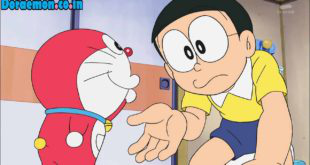
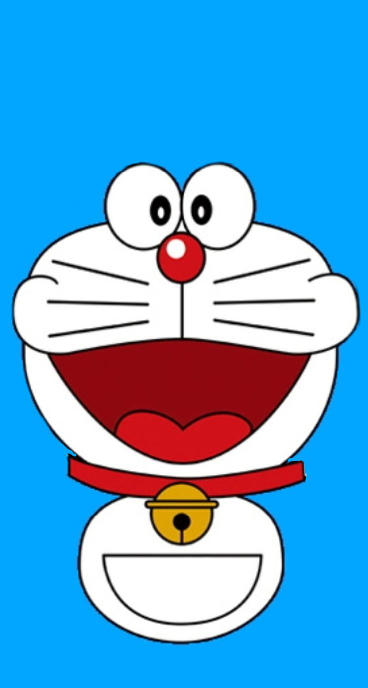
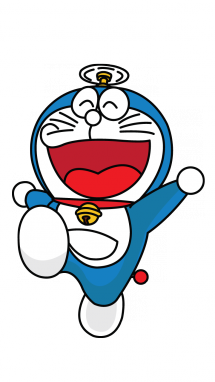
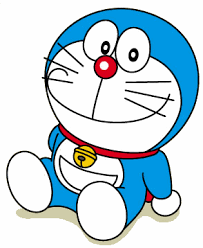
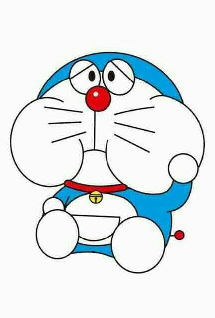
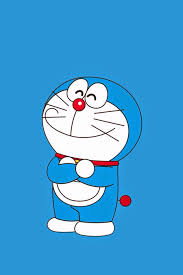
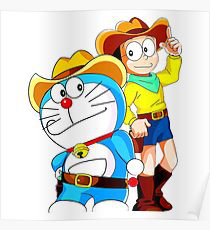
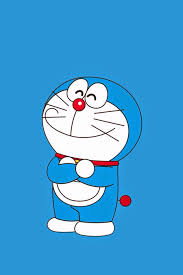
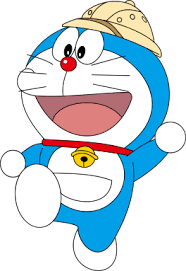
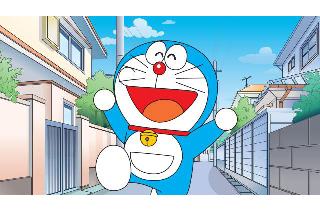
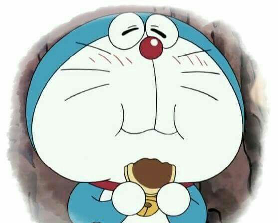
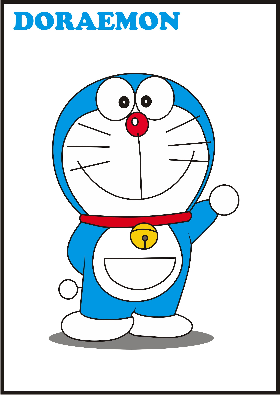
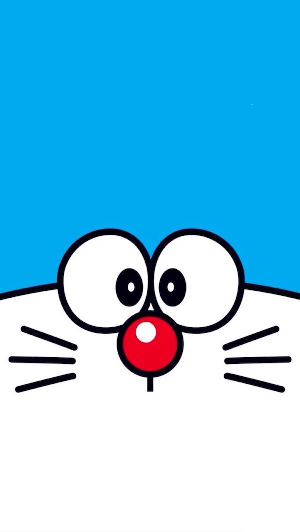
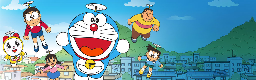
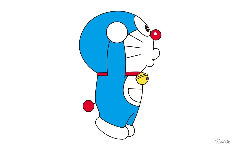
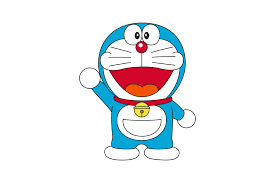
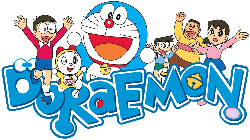
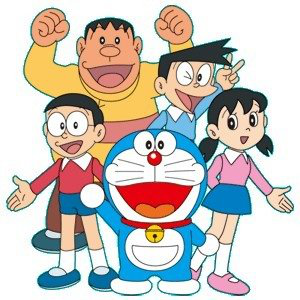
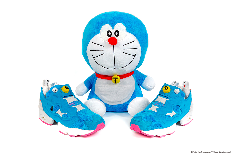
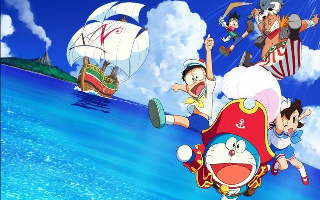
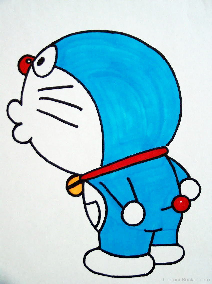
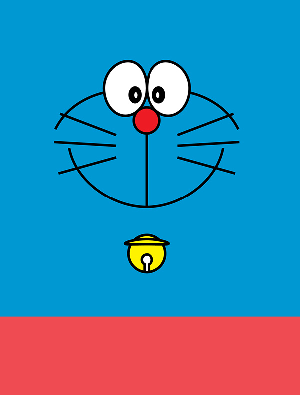
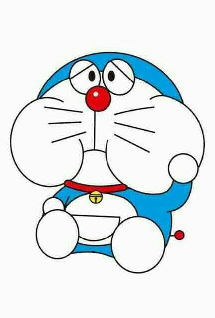
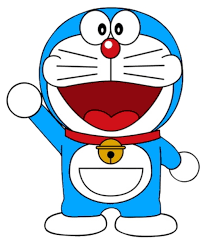
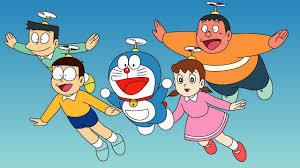
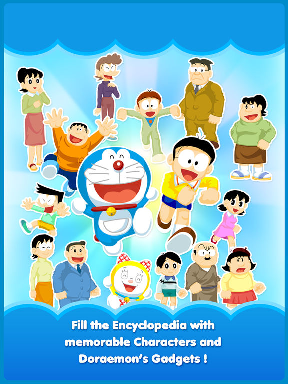
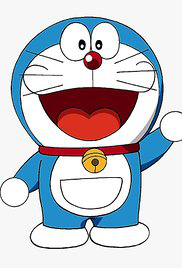
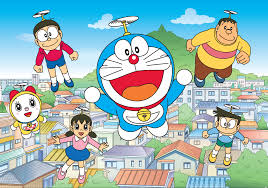
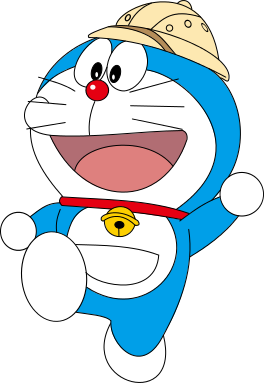
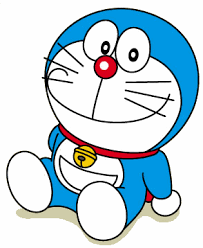
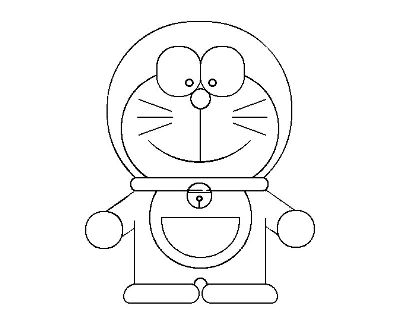
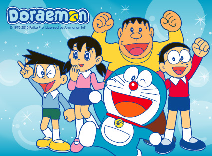
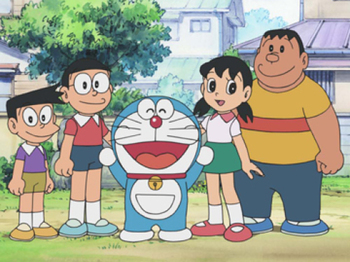
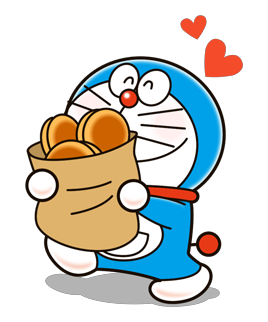
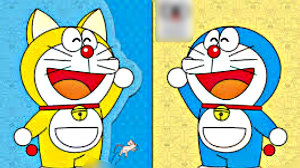
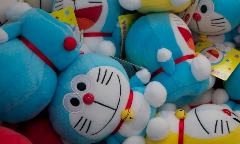
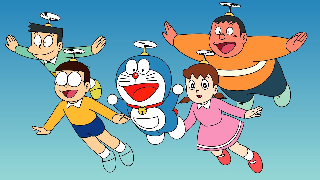
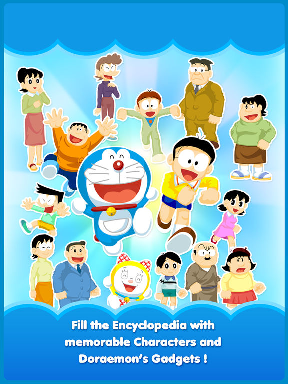
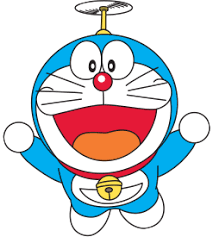
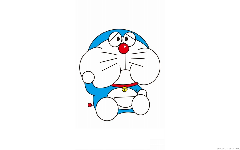
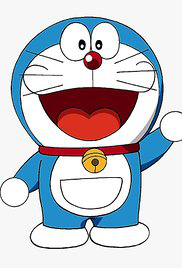
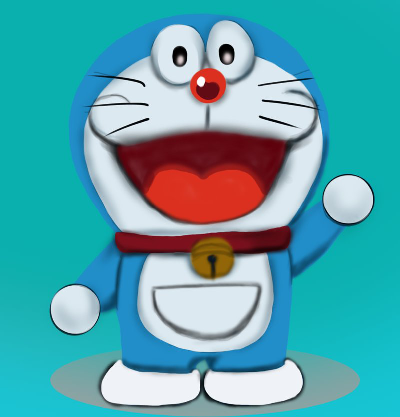
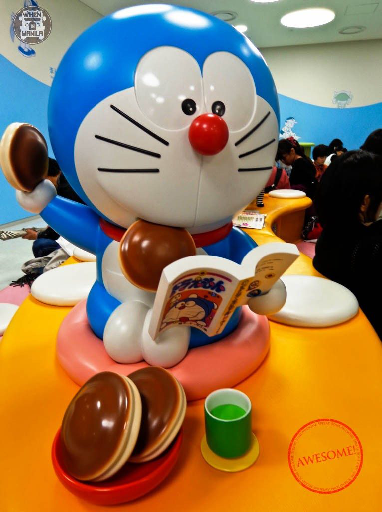
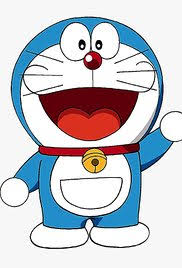
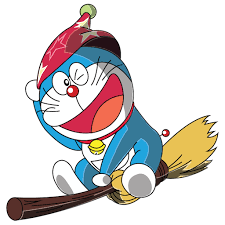
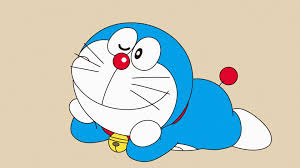
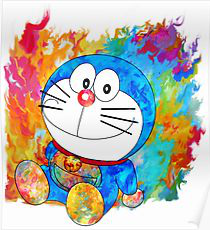
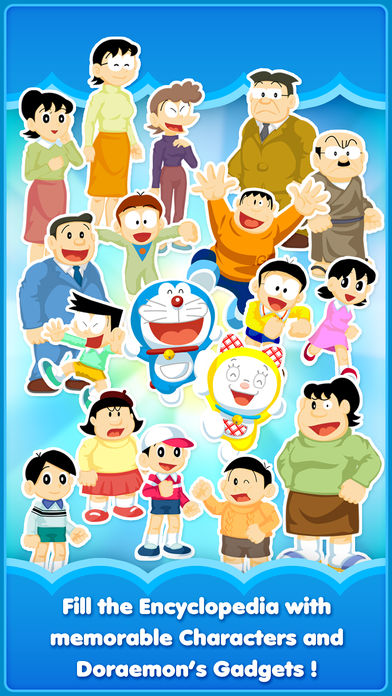
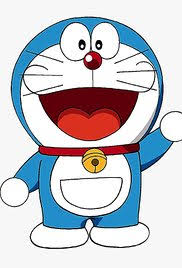
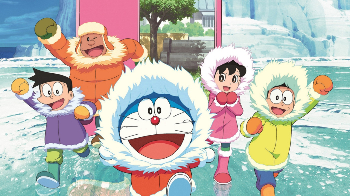
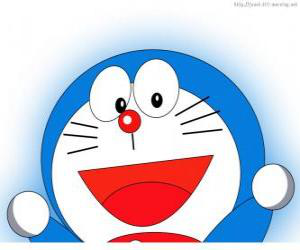
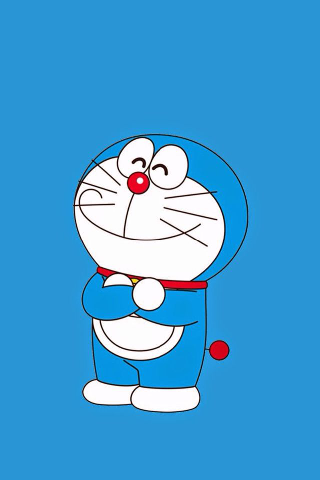
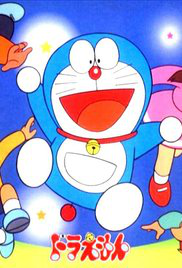
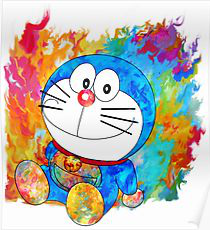
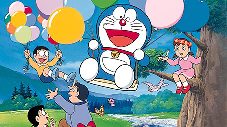
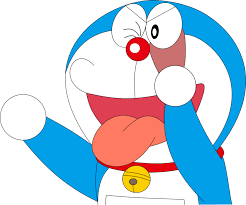
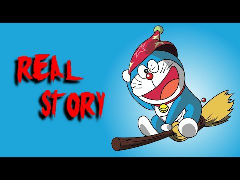
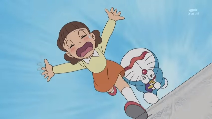
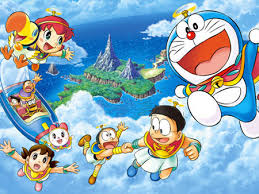
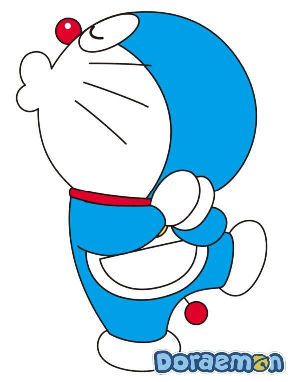
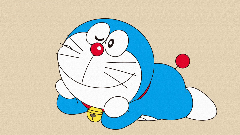
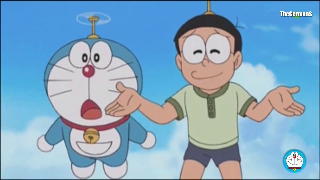
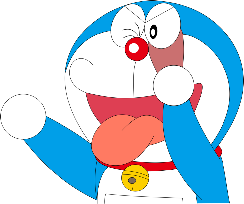
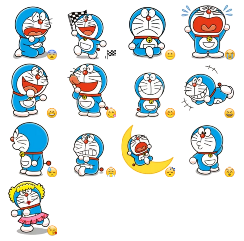
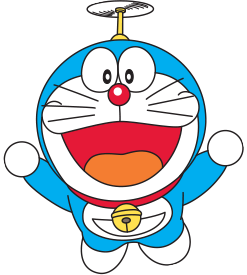
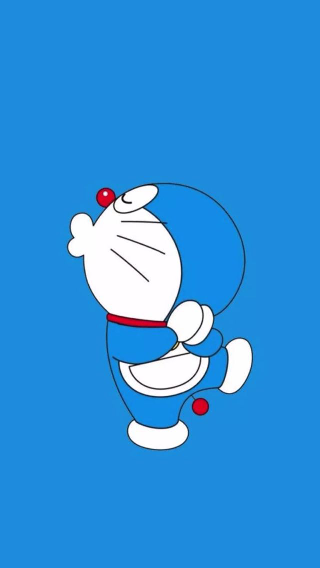
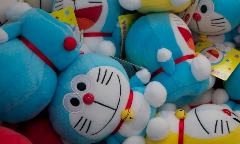
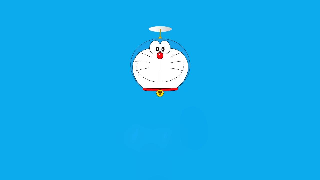
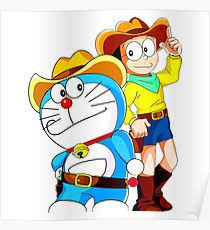
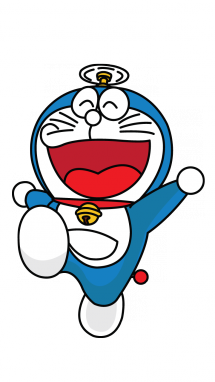
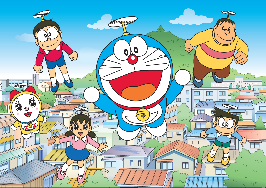
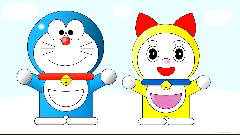
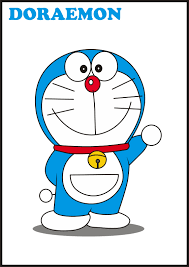
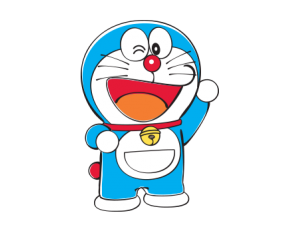
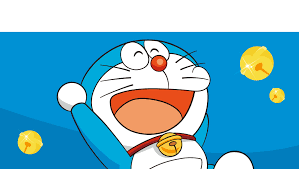
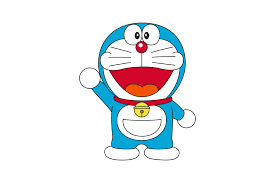
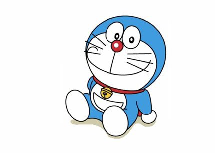
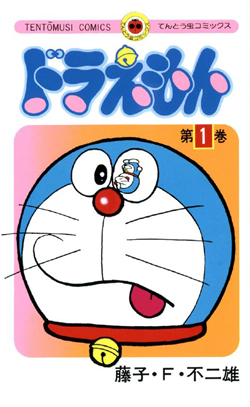
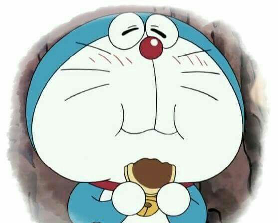
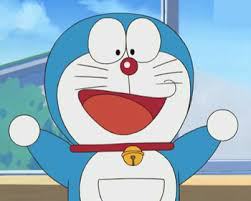
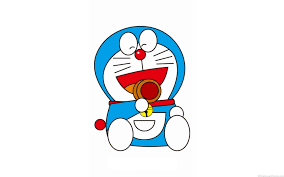
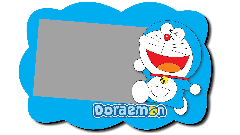
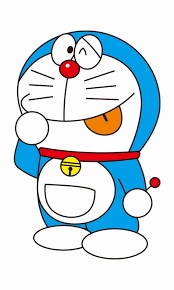
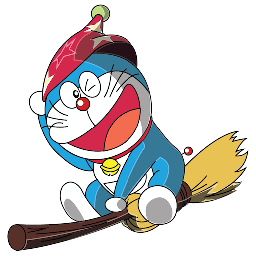
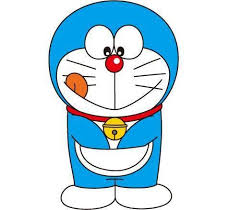
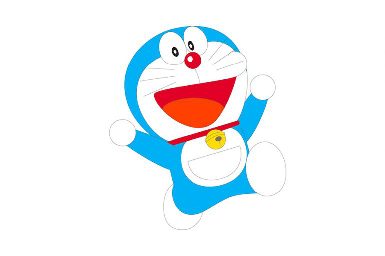
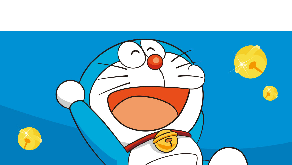
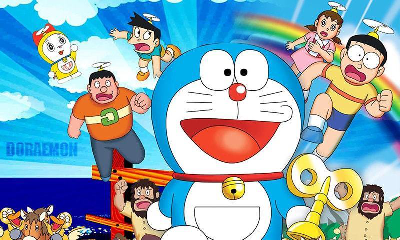
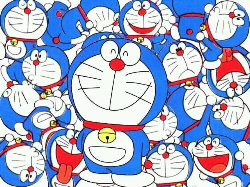
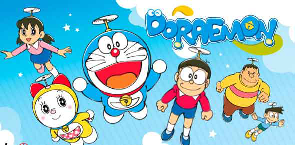
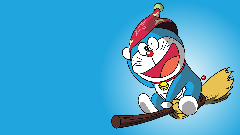
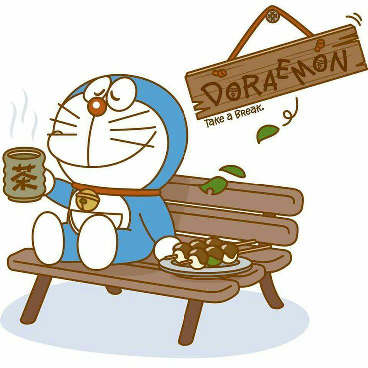
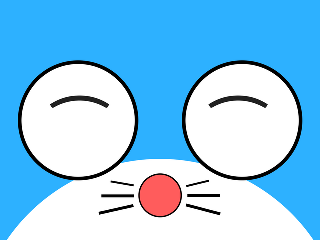
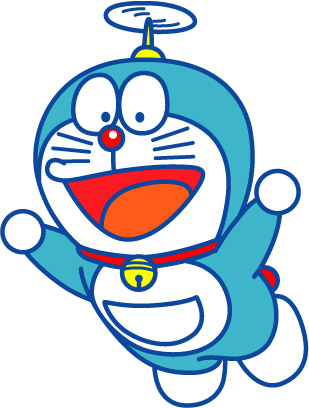
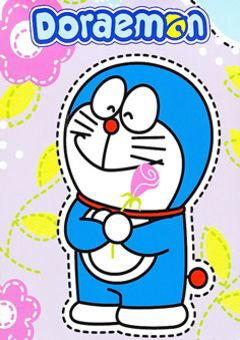
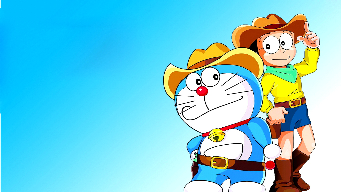
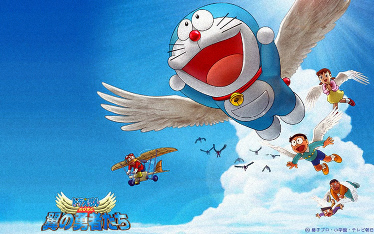
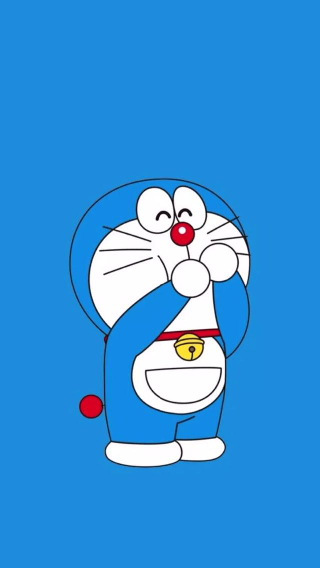
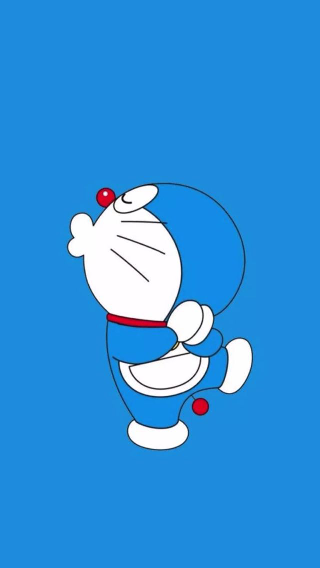
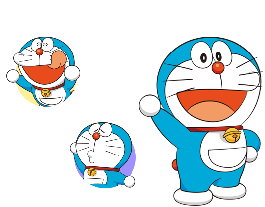

In [10]:
data.explore()

In [11]:
train_data, test_data = data.random_split(0.8, seed=2)

In [15]:
model = tc.image_classifier.create(train_data, target='label')

Download completed: /var/tmp/model_cache/resnet-50-symbol.json
Performing feature extraction on resized images...
Completed  64/168
Completed 128/168
Completed 168/168
PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 159

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 2048

Number of coefficients      : 2049

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 4        | 0.250000  | 1.077702     | 0.836478          | 0.777778            |

| 1         | 6        | 0.250000  | 1.111251     | 0.962264          | 1.000000            |

| 2         | 9        | 1.250000  | 1.175760     | 0.974843          | 1.000000            |

| 3         | 11       | 1.250000  | 1.208500     | 0.981132          | 1.000000            |

| 4         | 12       | 1.250000  | 1.233765     | 0.974843          | 1.000000            |

| 9         | 22       | 4.326382  | 1.388958     | 1.000000          | 1.000000            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

In [25]:
predictions = model.predict(test_data)
metrics = model.evaluate(test_data)
print("准确度")
print(metrics['accuracy'])










Performing feature extraction on resized images...
Completed 31/31
准确度
1.0


In [26]:
predictions


dtype: str
Rows: 31
['doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'walle', 'walle', 'walle', 'walle', 'walle', 'walle', 'walle', 'walle', 'walle', 'walle', 'walle', 'walle']

In [27]:
test_data['label']

dtype: str
Rows: 31
['doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'walle', 'walle', 'walle', 'walle', 'walle', 'walle', 'walle', 'walle', 'walle', 'walle', 'walle', 'walle']

In [33]:
test_data[test_data['label'] != predictions]

Columns:
	path	str
	image	Image
	label	str

Rows: 0

Data:
	[]

IndexError: SFrame index out of range